Image Manipulations

1) Create numpy array from image object.


Type :  <class 'PIL.JpegImagePlugin.JpegImageFile'>


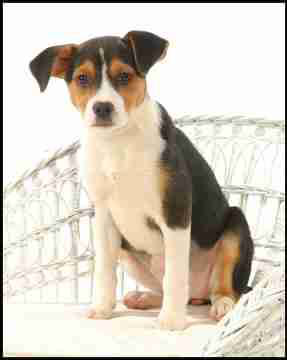

In [ ]:
from PIL import Image
from IPython.display import display

img = Image.open('doga.jpg')
print("Type : ", type(img))
display(img)


In [ ]:
#converting into numpy array
import numpy as np

img_arr = np.array(img)
print("Type : ", type(img_arr))
print("Shape : ", img_arr.shape)
print(img_arr)

Type :  <class 'numpy.ndarray'>
Shape :  (360, 287, 3)
[[[ 11  11  11]
  [  0   0   0]
  [  4   4   4]
  ...
  [ 60  60  60]
  [  6   6   6]
  [  0   0   0]]

 [[ 10  10  10]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 57  57  57]
  [  0   0   0]
  [  0   0   0]]

 [[  4   4   4]
  [  0   0   0]
  [ 19  19  19]
  ...
  [109 109 109]
  [ 15  15  15]
  [  0   0   0]]

 ...

 [[ 12  14   3]
  [ 10  12   1]
  [ 32  34  23]
  ...
  [ 63  64  56]
  [ 24  25  17]
  [  3   4   0]]

 [[  5   6   0]
  [  0   1   0]
  [  0   1   0]
  ...
  [ 13  14   8]
  [  4   5   0]
  [  0   1   0]]

 [[ 15  16   8]
  [ 10  11   3]
  [  7   8   0]
  ...
  [ 11  12   6]
  [ 10  11   5]
  [  7   8   2]]]


Type :  <class 'PIL.Image.Image'>


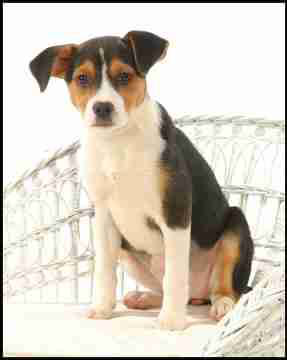

In [ ]:
#converting numpy object into pil image
img_pil = Image.fromarray(img_arr)

print("Type : ", type(img_pil))
display(img_pil)

2) Converting from one file format to another.


In [ ]:
#jpg to png using PIL

img_jpg = Image.open('dogb.jpg')
img_jpg.save('dogb.png')

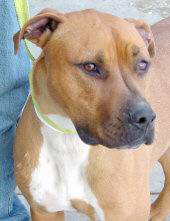

In [ ]:
#lets load the saved png image
img_png = Image.open('dogb.png')
display(img_png)

In [ ]:
#png to jpg using PIL

save_jpg = img_png.save('saved.jpg')

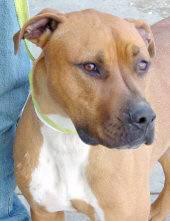

In [ ]:
jpg = Image.open('saved.jpg')
display(jpg)

3) Cropping an Image. 
Take RGB image and crop it.

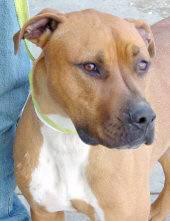

'original'


--------------------------------------



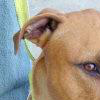

'cropped'

In [ ]:
#using direct function in python

img_crop = jpg.crop((0, 0, 100, 100))

display(jpg, 'original')
print("\n--------------------------------------\n")
display(img_crop, 'cropped')



(221, 170, 3)
(100, 100, 3)


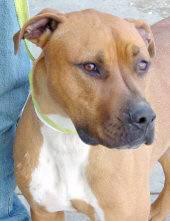

'original'


--------------------------------------



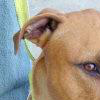

'cropped'

In [ ]:
#cropping using indexing

img_arr = np.array(jpg)
print(img_arr.shape)

img_arr = img_arr[0 : 100, 0 : 100]
img_crop = Image.fromarray(img_arr)
print(img_arr.shape)
display(jpg, 'original')
print("\n--------------------------------------\n")
display(img_crop, 'cropped')


4) Negative of an Image.

In [ ]:
img_neg = 255 - img_arr

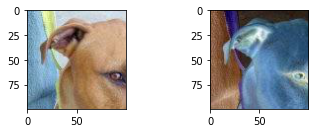

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(2, 2, 1)
plt.imshow(img_arr)

plt.subplot(2, 2, 2)
plt.imshow(img_neg)

5) Creating a circular mask on the Image

In [ ]:
import cv2
img = cv2.imread('dogd.jpg')
mask = np.zeros(img.shape, dtype = np.uint8)
mask = cv2.circle(mask, (260, 300), 225, (255, 255, 255), -1)

result = cv2.bitwise_and(img, mask)
result[mask == 0] == 255

array([False, False, False, ..., False, False, False])

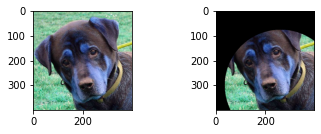

In [ ]:
plt.subplot(2, 2, 1)
plt.imshow(img)

plt.subplot(2, 2, 2)
plt.imshow(result)

6) Reading and displaying multiple images at once.

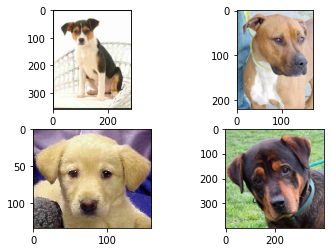

In [ ]:
import matplotlib.image as mpimg
img_names = ['doga.jpg', 'dogb.jpg', 'dogc.jpg', 'dogd.jpg']
r, c = 2, 2

for i, file in enumerate(img_names):
  img = mpimg.imread(file)
  plt.subplot(r, c, i + 1)
  plt.imshow(img)
  

7) Creating a thumbnail of the image

In [ ]:
img = Image.open('dogd.jpg')

img.thumbnail((50, 50))
img.save('thumbnail.jpg')

In [ ]:
img_orig = Image.open('dogd.jpg')
print(img_orig.size)
img_thumb = Image.open('thumbnail.jpg')
print(img_thumb.size)

(399, 400)
(50, 50)


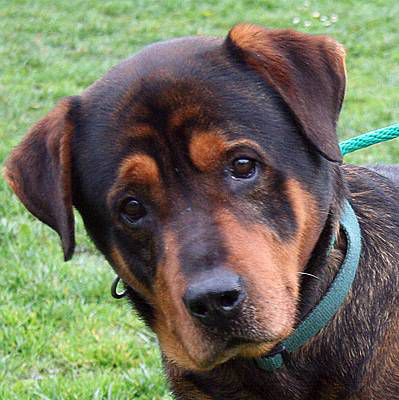

'original'


--------------------------------------



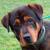

'thumbnail'

In [ ]:
display(img_orig, 'original')
print("\n--------------------------------------\n")
display(img_thumb, 'thumbnail')

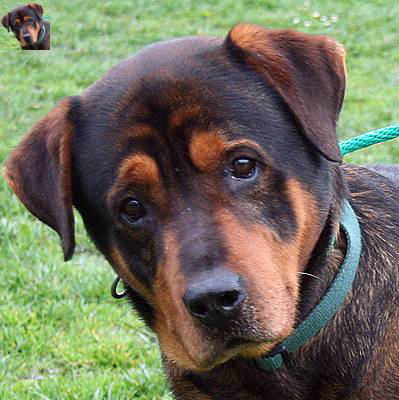

In [ ]:
#pasting the thumbnail on the original image.
Image.Image.paste(img_orig, img_thumb)
display(img_orig)

8. Drawing on an image in Python:
a) You can draw lines or other geometric shapes on an image. For example, drawing
ellipse on input image.

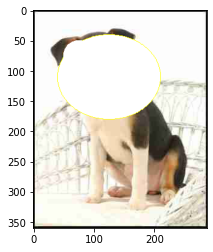

In [ ]:
from PIL import ImageDraw
draw = ImageDraw.Draw(img)
draw.ellipse([50, 50, 100, 100], fill = "#ffffff")
plt.imshow(img)

b) Drawing text on an image. Write some text on input image. Use a function in Python
to change its font as well


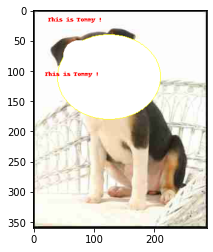

In [ ]:
tt = ImageDraw.Draw(img)
tt.text((20, 100), "This is Tommy !", fill = (255, 0, 0))
plt.imshow(img)

9. R,G,B channels splitting and merging. Read any RGB image as input, split three
channels R, G, B and display these channels/matrices as output images. Then, merge
the three channels again and display same RGB image

In [ ]:
import cv2
import numpy 
img = cv2.imread('doga.jpg')
b,g,r = cv2.split(img)
zeros = numpy.zeros(b.shape,numpy.uint8)
b1=cv2.merge((b,zeros,zeros))
g1=cv2.merge((zeros,g,zeros))
r1=cv2.merge((zeros,zeros,r))
cv2.imshow('blue',b1)
cv2.waitKey(0)
cv2.imshow('green',g1)
cv2.waitKey(0)
cv2.imshow('red',r1)
cv2.waitKey(0)
original=cv2.merge((b,g,r))
cv2.imshow('original',original)
cv2.waitKey(0)
cv2.destroyAllWindows()